In [22]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv('../data/input/air.csv')
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [24]:
x_all = data['#Passengers'].values
x_all = x_all / max(x_all)  # нормализация до [0;1]
x_all

array([0.18006431, 0.18971061, 0.21221865, 0.2073955 , 0.19453376,
       0.2170418 , 0.23794212, 0.23794212, 0.21864952, 0.19131833,
       0.16720257, 0.18971061, 0.18488746, 0.20257235, 0.2266881 ,
       0.2170418 , 0.20096463, 0.23954984, 0.2733119 , 0.2733119 ,
       0.25401929, 0.21382637, 0.18327974, 0.22508039, 0.23311897,
       0.24115756, 0.28617363, 0.26205788, 0.27652733, 0.28617363,
       0.31993569, 0.31993569, 0.29581994, 0.26045016, 0.23472669,
       0.26688103, 0.27491961, 0.28938907, 0.31028939, 0.29099678,
       0.29421222, 0.35048232, 0.36977492, 0.38906752, 0.33601286,
       0.30707395, 0.27652733, 0.31189711, 0.31511254, 0.31511254,
       0.37942122, 0.3778135 , 0.3681672 , 0.39067524, 0.4244373 ,
       0.43729904, 0.38102894, 0.3392283 , 0.28938907, 0.32315113,
       0.32797428, 0.3022508 , 0.3778135 , 0.36495177, 0.37620579,
       0.4244373 , 0.48553055, 0.47106109, 0.41639871, 0.3681672 ,
       0.32636656, 0.3681672 , 0.38906752, 0.37459807, 0.42926

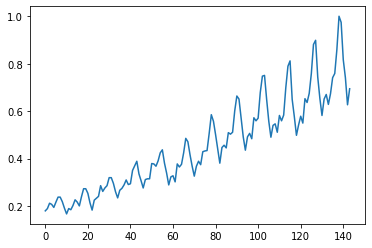

In [25]:
plt.plot(x_all)

In [26]:
train = x_all[:100]
test = x_all[100:]

In [27]:
m = 10
lst_inputs = []

for i in range(train.shape[0] - m):
    lst_inputs.append(train[i:m+i])

x_train = np.array(lst_inputs)

lst_test_inputs = []

for i in range(test.shape[0] - m):
    lst_test_inputs.append(test[i:m+i])

x_test = np.array(lst_test_inputs)

y_train = train[m:train.shape[0]]
y_test = test[m:test.shape[0]]

x_train.shape, x_test.shape

((90, 10), (34, 10))

In [28]:
import tensorflow as tf

masking_layer = keras.layers.Masking()
unmasked_embedding = tf.cast(
    tf.tile(tf.expand_dims(x_train, axis=1), [1, 1, 1]),
    tf.float32
)

x_train_masked = masking_layer(unmasked_embedding)

masking_layer = keras.layers.Masking()
unmasked_embedding = tf.cast(
    tf.tile(tf.expand_dims(x_test, axis=1), [1, 1, 1]),
    tf.float32
)

x_test_masked = masking_layer(unmasked_embedding)
x_train_masked.shape

TensorShape([90, 1, 10])

In [29]:
model = keras.Sequential(name='RNN')
model.add(keras.layers.SimpleRNN(m, activation='tanh', input_dim=m))
model.add(keras.layers.Dense(2*m+1, activation='sigmoid'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 21)                231       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 22        
Total params: 463
Trainable params: 463
Non-trainable params: 0
_________________________________________________________________


In [30]:
opt = keras.optimizers.SGD(learning_rate=0.7)
f_loss = keras.losses.MeanSquaredError()
met = keras.metrics.Accuracy()

model.compile(
    optimizer=opt,
    loss=f_loss,
    metrics=met
)

### Обучение

In [31]:
ep = 100

model.fit(
    x=x_train_masked,
    y=y_train,
    batch_size=1,
    epochs=ep,
    validation_data=(x_test_masked, y_test)
)

Epoch 1/100
90/90 [==============================] - 0s 4ms/step - loss: 0.0176 - accuracy: 0.0000e+00 - val_loss: 0.1346 - val_accuracy: 0.0000e+00
Epoch 2/100
90/90 [==============================] - 0s 1ms/step - loss: 0.0132 - accuracy: 0.0000e+00 - val_loss: 0.1201 - val_accuracy: 0.0000e+00
Epoch 3/100
90/90 [==============================] - 0s 1ms/step - loss: 0.0101 - accuracy: 0.0000e+00 - val_loss: 0.0782 - val_accuracy: 0.0000e+00
Epoch 4/100
90/90 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 0.0000e+00 - val_loss: 0.0419 - val_accuracy: 0.0000e+00
Epoch 5/100
90/90 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 0.0000e+00 - val_loss: 0.0415 - val_accuracy: 0.0000e+00
Epoch 6/100
90/90 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.0000e+00 - val_loss: 0.0217 - val_accuracy: 0.0000e+00
Epoch 7/100
90/90 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.0000e+00 - v

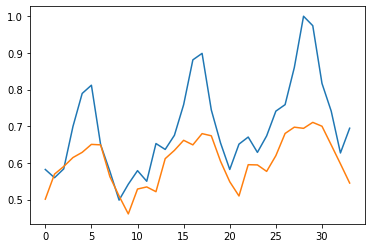

In [32]:
y = model.predict(x_test_masked)

plt.plot(y_test)
plt.plot(y)

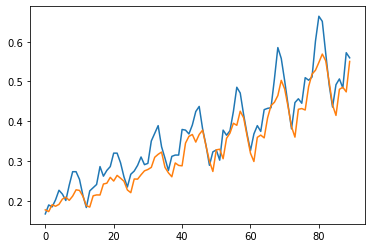

In [33]:
y = model.predict(x_train_masked)

plt.plot(y_train)
plt.plot(y)